In [1]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules

#mlxtend library is used for apriori

In [2]:
data = pd.read_excel('Online Retail.xlsx')

#Online Retail.xlsx has the data (50,000+ enteries)

In [3]:
data.head()

#How the data looks like

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.columns

#columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
data.shape

#(rows, columns)

(541909, 8)

In [6]:
data.isnull().values.any()

#check for null vals

True

In [7]:
data.isnull().sum()

#finding null vals

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# DATA PRE PROCESSING

In [8]:
data_fil = data[data['Description']!= 'POSTAGE']

#Filtering data to remove rows with postage.

In [9]:
data_fil.shape

#(rows, columns)

(540657, 8)

In [10]:
# Stripping extra spaces in the description 

data_fil['Description'] = data_fil['Description'].str.strip() 
  
# Dropping the rows without any invoice number 

data_fil.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data_fil['InvoiceNo'] = data_fil['InvoiceNo'].astype('str') 
  
# Dropping all transactions which were done on credit (invoice numbers starting with c) - Not including them

data_fil = data_fil[~data_fil['InvoiceNo'].str.contains('C')]

<ipython-input-10-8c9fe8318544>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fil['Description'] = data_fil['Description'].str.strip()
<ipython-input-10-8c9fe8318544>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fil.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
<ipython-input-10-8c9fe8318544>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [11]:
data_fil.Country.unique()

#There are transcation by people from different countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [12]:
data_fil.Description.unique().size

#Number of unique items bought in the list

4194

# Analysis for France

In [13]:
basket_France = (data_fil[data_fil['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

#Only considering France transactions

In [14]:
basket_France.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


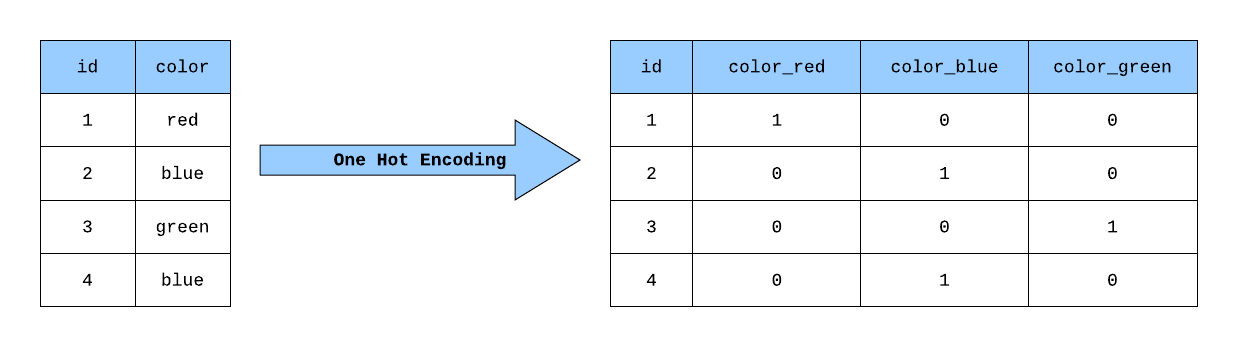

In [15]:
#Hot encoding function:

def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [16]:
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded

#Applying ohe to france basket

In [17]:
basket_France.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Apriori


In [18]:
# Building the model 
frq_items = apriori(basket_France, min_support = 0.1, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules_france = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules_france = rules_france.sort_values(['confidence', 'lift'], ascending =[False, False])

In [19]:
rules_france.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.103359,0.129199,0.100775,0.975000,7.546500,0.087421,34.832041
12,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.103359,0.139535,0.100775,0.975000,6.987500,0.086353,34.418605
9,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.129199,0.139535,0.124031,0.960000,6.880000,0.106003,21.511628
8,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.139535,0.129199,0.124031,0.888889,6.880000,0.106003,7.837209
10,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.124031,0.134367,0.100775,0.812500,6.046875,0.084110,4.616710


In [20]:
rules_france.shape

#rows, columns

(16, 9)

In [21]:
Item = {'SET/6 RED SPOTTY PAPER PLATES'}

rules_france[rules_france['antecedents']== Item]['consequents']

#finding consequents for a given item

9                         (SET/6 RED SPOTTY PAPER CUPS)
6                  (SET/20 RED RETROSPOT PAPER NAPKINS)
14    (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...
Name: consequents, dtype: object

Rules here contains the different combinations of frequently occuring items, sorted by confidence.

# Analysis for Germany


In [22]:
basket_Germany = (data_fil[data_fil['Country'] =="Germany"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

#Only considering Germany transactions

In [23]:
basket_encoded = basket_Germany.applymap(hot_encode) 
basket_Germany = basket_encoded

#using the already defined one hot encoding function for germany basket

In [24]:
basket_Germany.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Apriori


In [25]:
# Building the model 
frq_items = apriori(basket_Germany, min_support = 0.1, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules_germany = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules_germany = rules_germany.sort_values(['confidence', 'lift'], ascending =[False, False])

In [26]:
rules_germany

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.160356,0.249443,0.13363,0.833333,3.340774,0.09363,4.503341
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.249443,0.160356,0.13363,0.535714,3.340774,0.09363,1.808463


In [27]:
Item = {'ROUND SNACK BOXES SET OF 4 FRUITS'}

rules_germany[rules_germany['antecedents']== Item]['consequents']
#finding consequents for a given item

0    (ROUND SNACK BOXES SET OF4 WOODLAND)
Name: consequents, dtype: object

# Combined Analysis


In [28]:
basket = (data_fil
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

#All the data (All countries)

In [29]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
basket_encoded = basket.applymap(hot_encode) 
basket = basket_encoded

#Applying ohe to combined basket

In [31]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
basket.shape

(20533, 4193)

# Using Apriori


In [33]:
# Building the model 
# Support here is lesser as in a larger sample set individual contribution (support) reduces
frq_items = apriori(basket, min_support = 0.02, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [34]:
rules.head()

#This gives us even a few grouped items, which we will have to ignore

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
150,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029173,0.049433,0.026397,0.904841,18.304540,0.024954,9.989296
149,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030828,0.051916,0.026397,0.856240,16.492663,0.024796,6.594911
23,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037306,0.049433,0.030828,0.826371,16.717114,0.028984,5.474696
154,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)",(JUMBO BAG RED RETROSPOT),0.025082,0.101885,0.020114,0.801942,7.871066,0.017559,4.534601
137,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037306,0.051916,0.029173,0.781984,15.062368,0.027236,4.348695


In [35]:
rules.shape

#Number of items and their consequents

(160, 9)

In [36]:
rules['antecedents'].unique().size

#Number of unique frequent items (May include grouped objects)

62

# Saving data into a file


In [37]:
store = rules["antecedents"].unique()
#save the unique frequent items in an an array

Store = pd.DataFrame(store, columns=['Items'])
#Make it into a dataframe

Storenew = pd.DataFrame(columns=['Items'])
#Another dataframe to filter out the grouped frequent items

In [38]:
Store.head()

#As can be seen there are grouped items

,Items
0,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY..."
1,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."
2,(PINK REGENCY TEACUP AND SAUCER)
3,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)"
4,(GREEN REGENCY TEACUP AND SAUCER)


In [39]:
for x in Store["Items"]:
    if len(x)==1:
        #print(x)
        Storenew = Storenew.append({'Items' : list(x)[0]}, ignore_index = True)
        
#To only include the individual frequent items

In [40]:
Storenew.size

#Number of individual items

56

In [41]:
Storenew = Storenew.sort_values(["Items"])

In [42]:
Storenew.head()

#Storenew has individual frequent items in sorted order

,Items
31,60 TEATIME FAIRY CAKE CASES
11,ALARM CLOCK BAKELIKE GREEN
20,ALARM CLOCK BAKELIKE PINK
18,ALARM CLOCK BAKELIKE RED
4,CHARLOTTE BAG PINK POLKADOT


In [43]:
#Store['Items'].to_csv('File2.csv', index=False, header=False)
Storenew['Items'].to_csv('File2.csv', index=False)

#Storing the values in a csv file. Index=False to remove row numbers.

# Taking input from a file and outputting the consequents


In [44]:
ans = pd.read_csv('File2.csv')

#Taking input from the file we just inserted
#Sampling so that later I will know the know the steps when using results from MS forms

In [45]:
ans.head()

,Items
0,60 TEATIME FAIRY CAKE CASES
1,ALARM CLOCK BAKELIKE GREEN
2,ALARM CLOCK BAKELIKE PINK
3,ALARM CLOCK BAKELIKE RED
4,CHARLOTTE BAG PINK POLKADOT


In [46]:
final = pd.DataFrame(columns = ['Antecedent', 'Consequent'])
#final will hold the frequent item pairs for the items in ans.

for item in ans["Items"]:
    #print(item)
    for x in rules[rules['antecedents']== frozenset({item})]['consequents']:
        #print(x)
        if len(x)==1:
            final = final.append({'Antecedent' : item , 'Consequent' : list(x)[0]}, ignore_index = True)
            #print('Antecedent: ',item,' Consequent:', list(x)[0])

In [47]:
final.head()

#Item and recommended item pairs

,Antecedent,Consequent
0,60 TEATIME FAIRY CAKE CASES,PACK OF 72 RETROSPOT CAKE CASES
1,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED
2,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK
3,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED
4,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE GREEN


In [48]:
final.set_index(['Antecedent', 'Consequent']).head(10)

#Indexing

Empty DataFrame
Columns: []
Index: [(60 TEATIME FAIRY CAKE CASES, PACK OF 72 RETROSPOT CAKE CASES), (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED), (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE PINK), (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE RED), (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN), (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE GREEN), (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE PINK), (CHARLOTTE BAG PINK POLKADOT, RED RETROSPOT CHARLOTTE BAG), (CHARLOTTE BAG SUKI DESIGN, RED RETROSPOT CHARLOTTE BAG), (CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE BAG)]

# Using Microsoft form results


In [49]:
form = pd.read_excel(r"C:\Users\RahulV\Downloads\Pick an Item(1-34).xlsx")

#Set file location to the downloaded MS form results excel sheet.

In [50]:
form.head()

#Viewing the data
#Has a lot of miscellaneous columns we need to drop

,ID,Start time,Completion time,Email,Name,Item:
0,14,2021-07-14 22:39:35,2021-07-14 22:39:44,Rahul.Vegesna@lntinfotech.com,Rahul Vegesna,JUMBO BAG PINK POLKADOT
1,15,2021-07-18 15:58:51,2021-07-18 15:59:29,Gaurvit.Kumar@lntinfotech.com,Gaurvit Kumar,SPACEBOY LUNCH BOX
2,16,2021-07-23 15:29:56,2021-07-23 15:31:23,VenkataPavankumar.Mokshagundam@lntinfotech.com,VenkataPavankumar Mokshagundam,WOODEN PICTURE FRAME WHITE FINISH
3,17,2021-07-23 15:30:02,2021-07-23 15:31:55,Ketan.Muddalkar@lntinfotech.com,Ketan Muddalkar,JUMBO BAG SPACEBOY DESIGN
4,18,2021-07-23 15:33:39,2021-07-23 15:34:40,Neeharika.Poduri@lntinfotech.com,Neeharika Poduri,ROSES REGENCY TEACUP AND SAUCER


In [51]:
form = form.drop(['ID', 'Start time', 'Completion time', 'Email'], axis=1)

#dropping the unwanted columns

In [52]:
form

,Name,Item:
0,Rahul Vegesna,JUMBO BAG PINK POLKADOT
1,Gaurvit Kumar,SPACEBOY LUNCH BOX
2,VenkataPavankumar Mokshagundam,WOODEN PICTURE FRAME WHITE FINISH
3,Ketan Muddalkar,JUMBO BAG SPACEBOY DESIGN
4,Neeharika Poduri,ROSES REGENCY TEACUP AND SAUCER
5,Vivekanand Sahu,LUNCH BAG WOODLAND
6,Himanshu4 Singh,JUMBO BAG BAROQUE BLACK WHITE
7,Ankesh Phapale,LUNCH BAG WOODLAND
8,Harsh Bhatia,WOODLAND CHARLOTTE BAG
9,Kashyapa Chitta,JUMBO BAG APPLES


In [53]:
form["Name"]=form["Name"].apply(lambda x: x.split(" ")[0])

#Only taking First name

In [54]:
form

,Name,Item:
0,Rahul,JUMBO BAG PINK POLKADOT
1,Gaurvit,SPACEBOY LUNCH BOX
2,VenkataPavankumar,WOODEN PICTURE FRAME WHITE FINISH
3,Ketan,JUMBO BAG SPACEBOY DESIGN
4,Neeharika,ROSES REGENCY TEACUP AND SAUCER
5,Vivekanand,LUNCH BAG WOODLAND
6,Himanshu4,JUMBO BAG BAROQUE BLACK WHITE
7,Ankesh,LUNCH BAG WOODLAND
8,Harsh,WOODLAND CHARLOTTE BAG
9,Kashyapa,JUMBO BAG APPLES


In [55]:
Form = pd.DataFrame(form, columns=['Name','Item:'])

#Making a copy - not needed

In [56]:
Form

,Name,Item:
0,Rahul,JUMBO BAG PINK POLKADOT
1,Gaurvit,SPACEBOY LUNCH BOX
2,VenkataPavankumar,WOODEN PICTURE FRAME WHITE FINISH
3,Ketan,JUMBO BAG SPACEBOY DESIGN
4,Neeharika,ROSES REGENCY TEACUP AND SAUCER
5,Vivekanand,LUNCH BAG WOODLAND
6,Himanshu4,JUMBO BAG BAROQUE BLACK WHITE
7,Ankesh,LUNCH BAG WOODLAND
8,Harsh,WOODLAND CHARLOTTE BAG
9,Kashyapa,JUMBO BAG APPLES


In [57]:
form_answers = pd.DataFrame(columns = ['Name', 'Item', 'Consequents'])
#Final dataframe that'll hold name, item and all its consequents (recommended items)

for items in Form["Name"]:
    i = list(Form[Form['Name']==items]['Item:'])
    item = str(i[0])
    for x in rules[rules['antecedents']== frozenset({item})]['consequents']:
        form_answers = form_answers.append({'Name': items , 'Item' : item , 'Consequents' : list(x)[0]}, ignore_index = True)
        


In [65]:
form_answers.set_index(['Name', 'Item', 'Consequents']).head(60)

#Indexing the dataframe

Empty DataFrame
Columns: []
Index: [(Rahul, JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT), (Rahul, JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI), (Rahul, JUMBO BAG PINK POLKADOT, JUMBO SHOPPER VINTAGE RED PAISLEY), (Rahul, JUMBO BAG PINK POLKADOT, JUMBO BAG WOODLAND ANIMALS), (Rahul, JUMBO BAG PINK POLKADOT, JUMBO  BAG BAROQUE BLACK WHITE), (Rahul, JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI), (Gaurvit, SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX), (VenkataPavankumar, WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRAME ANTIQUE WHITE), (Ketan, JUMBO BAG SPACEBOY DESIGN, JUMBO BAG RED RETROSPOT), (Neeharika, ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER), (Neeharika, ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER), (Neeharika, ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER), (Neeharika, ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER), (Vivekanand, LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT), (Vivekanand, LUNCH BAG WOODLAND, LUNCH BAG SPACEBOY DESIGN), (Vivekanand, LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE), (Vivekanand, LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL.), (Himanshu4, JUMBO  BAG BAROQUE BLACK WHITE, JUMBO BAG RED RETROSPOT), (Himanshu4, JUMBO  BAG BAROQUE BLACK WHITE, JUMBO STORAGE BAG SUKI), (Himanshu4, JUMBO  BAG BAROQUE BLACK WHITE, JUMBO SHOPPER VINTAGE RED PAISLEY), (Himanshu4, JUMBO  BAG BAROQUE BLACK WHITE, JUMBO BAG PINK POLKADOT), (Ankesh, LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT), (Ankesh, LUNCH BAG WOODLAND, LUNCH BAG SPACEBOY DESIGN), (Ankesh, LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE), (Ankesh, LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL.), (Harsh, WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOTTE BAG), (Harsh, WOODLAND CHARLOTTE BAG, CHARLOTTE BAG SUKI DESIGN), (Kashyapa, JUMBO BAG APPLES, JUMBO BAG RED RETROSPOT), (Jayachandran, JAM MAKING SET WITH JARS, JAM MAKING SET PRINTED), (SaiSumanth, WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FRAME WHITE FINISH), (Darshit, WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FRAME WHITE FINISH), (Vedanta, DOTCOM POSTAGE, JUMBO BAG RED RETROSPOT), (Pragati, 60 TEATIME FAIRY CAKE CASES, PACK OF 72 RETROSPOT CAKE CASES), (Srinivas, LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT), (Srinivas, LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL.), (Srinivas, LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT), (Srinivas, LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN), (Srinivas, LUNCH BAG CARS BLUE, LUNCH BAG SUKI DESIGN), (Srinivas, LUNCH BAG CARS BLUE, LUNCH BAG WOODLAND), (AnamS, STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARLOTTE BAG), (AnamS, STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI DESIGN), (Mahavir, WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRAME ANTIQUE WHITE), (Aniket, WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FRAME WHITE FINISH), (Parag, RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG PINK POLKADOT), (Parag, RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG SUKI DESIGN), (Parag, RED RETROSPOT CHARLOTTE BAG, WOODLAND CHARLOTTE BAG), (Parag, RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARLOTTE BAG), (Parag, RED RETROSPOT CHARLOTTE BAG, JUMBO BAG RED RETROSPOT), (Chinmay, WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FRAME WHITE FINISH), (DivyaSravanthi, WHITE HANGING HEART T-LIGHT HOLDER, RED HANGING HEART T-LIGHT HOLDER), (DivyaSravanthi, WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT), (DivyaSravanthi, WHITE HANGING HEART T-LIGHT HOLDER, NATURAL SLATE HEART CHALKBOARD), (Gourav, ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED), (Gourav, ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE PINK), (Yash, WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOTTE BAG), (Yash, WOODLAND CHARLOTTE BAG, CHARLOTTE BAG SUKI DESIGN), (Amina, ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER), (Amina, ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER), (Amina, ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER), (Amina, ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER)]

In [60]:
form_answers.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]
).hide_index()

#Adding styling instead on indexing

Name,Item,Consequents
Rahul,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT
Rahul,JUMBO BAG PINK POLKADOT,JUMBO STORAGE BAG SUKI
Rahul,JUMBO BAG PINK POLKADOT,JUMBO SHOPPER VINTAGE RED PAISLEY
Rahul,JUMBO BAG PINK POLKADOT,JUMBO BAG WOODLAND ANIMALS
Rahul,JUMBO BAG PINK POLKADOT,JUMBO BAG BAROQUE BLACK WHITE
Rahul,JUMBO BAG PINK POLKADOT,JUMBO STORAGE BAG SUKI
Gaurvit,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
VenkataPavankumar,WOODEN PICTURE FRAME WHITE FINISH,WOODEN FRAME ANTIQUE WHITE
Ketan,JUMBO BAG SPACEBOY DESIGN,JUMBO BAG RED RETROSPOT
Neeharika,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER


In [61]:
form_answers.shape

(81, 3)